# Online Recommendation System Model Training

In [96]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import neattext.functions as nfx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel

###  Loading Datasets

In [97]:
datasets = pd.read_csv('online reccomendation system dataset.csv', encoding='latin-1')
datasets.tail()

,ID,course name,source,Url,is-paid,Instructor,level,no of enrollments,duration(hr),rating,review,published year,genre,Image Url
1494,1511,Writing Tools & Hacks: Copywriting/Blogging/Co...,Udemy,https://www.udemy.com/course/writing-tools-hacks/,True,Tyler Speegle,All Level,25508,1.5,4.1,4955,2022,Content writing,NaN
1495,1512,Profitable Blogging & Content Writing Creative...,Udemy,https://www.udemy.com/course/content-writing-a...,True,Alex Genadinik,All Level,12812,9.5,4.7,202,2023,Content writing,NaN
1496,1513,Alan Sharpe's B2B Content Writing Masterclass ...,Udemy,https://www.udemy.com/course/alan-sharpes-b2b-...,True,Alan Sharpe,All Level,1421,11.0,4.7,230,2023,Content writing,NaN
1497,1514,Alan Sharpe's 30-hr Copywriting Masterclass + ...,Udemy,https://www.udemy.com/course/alan-sharpe-copyw...,True,Alan Sharpe,All Level,18795,28.0,4.6,3381,2023,Content writing,NaN
1498,1515,The Complete Content Writing Course for 2024 -...,Udemy,https://www.udemy.com/course/complete-content-...,True,"Shubhi Saxena ,Vishal Singh Jadon",All Level,5265,5.0,4.2,1101,2023,Content writing,NaN


In [98]:
df = datasets.copy()

In [99]:
df.head()

,ID,course name,source,Url,is-paid,Instructor,level,no of enrollments,duration(hr),rating,review,published year,genre,Image Url
0,1,AWS: Building Modern Java Applications on AWS,Edx,http://surl.li/otdka,False,David Joyner,Basic,64526,34.0,4.0,324,2023,Programming,NaN
1,2,HarvardX: CS50's Introduction to Programming w...,Edx,http://surl.li/osxeb,False,David j MAlan,Basic,"789,913",50.0,4.0,"9,723",2023,Programming,NaN
2,3,GTx: Computing in Python I: Fundamentals and P...,Edx,http://surl.li/osxny,False,David Joyner,Basic,"244,493",45.0,4.6,41,2023,Programming,NaN
3,4,100 Days of Code: The Complete Python Pro Boot...,Udemy,https://www.udemy.com/course/100-days-of-code/,True,Dr. Angela Yu,All level,"1,125,818",54.0,4.5,"261,343",2023,Programming,NaN
4,5,The Complete Python Bootcamp From Zero to Hero...,Udemy,https://www.udemy.com/course/complete-python-b...,True,Jose Portilla,All level,"1,835,000",22.0,4.6,"490,149",2023,Programming,NaN


In [100]:
df.isna().sum()

ID                      0
course name             0
source                  0
Url                     0
is-paid                 0
Instructor              0
level                   0
no of enrollments       0
duration(hr)            0
rating                319
review                  0
published year          0
genre                   0
Image Url            1496
dtype: int64

In [101]:
df =df.drop("Image Url",axis=1)
df.head()

,ID,course name,source,Url,is-paid,Instructor,level,no of enrollments,duration(hr),rating,review,published year,genre
0,1,AWS: Building Modern Java Applications on AWS,Edx,http://surl.li/otdka,False,David Joyner,Basic,64526,34.0,4.0,324,2023,Programming
1,2,HarvardX: CS50's Introduction to Programming w...,Edx,http://surl.li/osxeb,False,David j MAlan,Basic,"789,913",50.0,4.0,"9,723",2023,Programming
2,3,GTx: Computing in Python I: Fundamentals and P...,Edx,http://surl.li/osxny,False,David Joyner,Basic,"244,493",45.0,4.6,41,2023,Programming
3,4,100 Days of Code: The Complete Python Pro Boot...,Udemy,https://www.udemy.com/course/100-days-of-code/,True,Dr. Angela Yu,All level,"1,125,818",54.0,4.5,"261,343",2023,Programming
4,5,The Complete Python Bootcamp From Zero to Hero...,Udemy,https://www.udemy.com/course/complete-python-b...,True,Jose Portilla,All level,"1,835,000",22.0,4.6,"490,149",2023,Programming


In [102]:
df["rating"].replace(np.nan, 0, inplace=True)

In [103]:
df.isna().sum()

ID                   0
course name          0
source               0
Url                  0
is-paid              0
Instructor           0
level                0
no of enrollments    0
duration(hr)         0
rating               0
review               0
published year       0
genre                0
dtype: int64

In [104]:
df.duplicated().sum()

0

In [105]:
df["source"].replace('class central', 'Class Central', inplace=True)
df["source"].replace('Class central', 'Class Central', inplace=True)


In [106]:
df['source'].value_counts()

source
Udemy            610
Youtube          348
Coursera         332
Alison            73
Edx               62
Future learn      54
Codecademy        14
Class Central      3
Pluralsight        3
Name: count, dtype: int64

In [107]:
sourcecount = pd.DataFrame(df["source"].value_counts())
sourcecount.reset_index(inplace=True)

# Sort by the "rating" in ascending order
# sourcecount.sort_values(by="rating", inplace=True)

# Resetting the index after sorting
sourcecount.reset_index(drop=True, inplace=True)

# Display the sorted DataFrame
sourcecount

,source,count
0,Udemy,610
1,Youtube,348
2,Coursera,332
3,Alison,73
4,Edx,62
5,Future learn,54
6,Codecademy,14
7,Class Central,3
8,Pluralsight,3


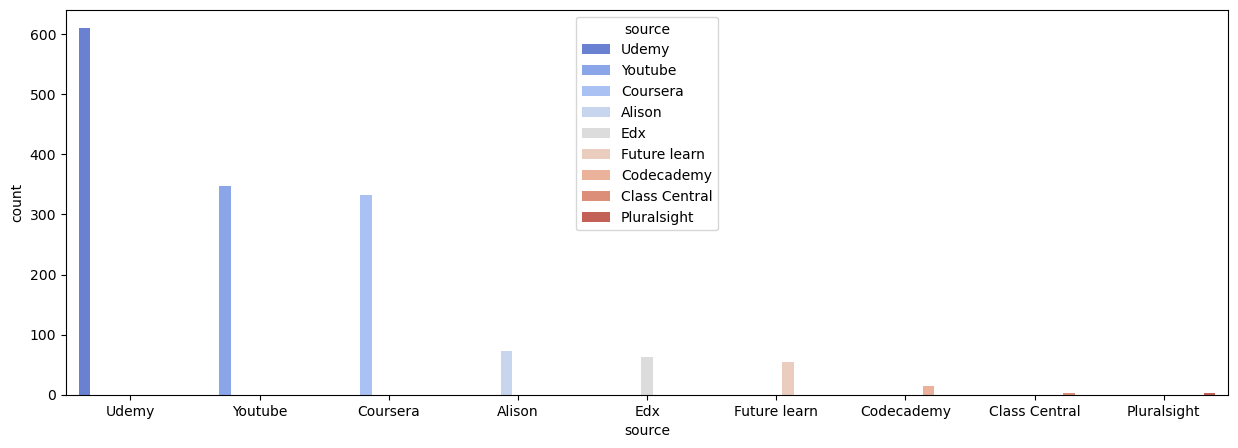

In [108]:
plt.figure(figsize=(15,5))
sns.barplot(x="source", y="count",data=sourcecount,hue="source",palette="coolwarm")
plt.show()

In [109]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [110]:
x = df[df['source'] == 'Youtube']
y = x[['source', 'rating']]
print(y)


       source  rating
132   Youtube     0.0
133   Youtube     0.0
134   Youtube     0.0
135   Youtube     0.0
136   Youtube     0.0
137   Youtube     0.0
138   Youtube     0.0
139   Youtube     0.0
140   Youtube     0.0
141   Youtube     0.0
142   Youtube     0.0
143   Youtube     0.0
144   Youtube     0.0
145   Youtube     0.0
146   Youtube     0.0
147   Youtube     0.0
148   Youtube     0.0
149   Youtube     0.0
187   Youtube     0.0
188   Youtube     0.0
189   Youtube     0.0
190   Youtube     0.0
191   Youtube     0.0
192   Youtube     0.0
193   Youtube     0.0
194   Youtube     0.0
195   Youtube     0.0
196   Youtube     0.0
983   Youtube     0.0
984   Youtube     0.0
985   Youtube     0.0
986   Youtube     0.0
987   Youtube     0.0
988   Youtube     0.0
989   Youtube     0.0
990   Youtube     0.0
991   Youtube     0.0
992   Youtube     0.0
993   Youtube     0.0
994   Youtube     0.0
995   Youtube     0.0
996   Youtube     0.0
997   Youtube     0.0
998   Youtube     0.0
999   Yout

In [111]:
df.columns

Index(['ID', 'course name', 'source', 'Url', 'is-paid', 'Instructor', 'level',
       'no of enrollments', 'duration(hr)', 'rating', 'review',
       'published year', 'genre'],
      dtype='object')

In [112]:
df['is-paid'].value_counts()

is-paid
False    813
True     686
Name: count, dtype: int64

In [113]:
df['level'].value_counts()

level
Basic           392
Intermediate    365
All Level       312
All level       209
All Levels       89
Intermedaite     48
Advanced         46
intermediate     21
Expert           15
AllLevel          1
Intermdeiate      1
Name: count, dtype: int64

In [114]:
df["level"].replace('All level', 'All Level', inplace=True)
df["level"].replace('All Levels', 'All Level', inplace=True)
df["level"].replace('AllLevel', 'All Level', inplace=True)
df["level"].replace('Intermdeiate', 'Intermediate', inplace=True)

In [115]:
df["level"].replace('Intermediate', 'Intermediate', inplace=True)
df["level"].replace('intermediate', 'Intermediate', inplace=True)
df["level"].replace('Intermedaite', 'Intermediate', inplace=True)
df["level"].replace('Expert', 'Advanced', inplace=True)

In [116]:
df['level'].value_counts()

level
All Level       611
Intermediate    435
Basic           392
Advanced         61
Name: count, dtype: int64

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1499 non-null   int64  
 1   course name        1499 non-null   object 
 2   source             1499 non-null   object 
 3   Url                1499 non-null   object 
 4   is-paid            1499 non-null   bool   
 5   Instructor         1499 non-null   object 
 6   level              1499 non-null   object 
 7   no of enrollments  1499 non-null   object 
 8   duration(hr)       1499 non-null   float64
 9   rating             1499 non-null   float64
 10  review             1499 non-null   object 
 11  published year     1499 non-null   int64  
 12  genre              1499 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(8)
memory usage: 142.1+ KB


In [118]:
df['review'] = df['review'].str.replace(',', '')
df['no of enrollments'] = df['no of enrollments'].str.replace(',', '')
df['no of enrollments'] = pd.to_numeric(df['no of enrollments']).astype('float64')
df['review'] = pd.to_numeric(df['review']).astype('float64')



In [119]:
df['review'] = pd.to_numeric(df['review']).astype('int64')

In [120]:
df['no of enrollments'] = pd.to_numeric(df['no of enrollments']).astype('int64')

In [121]:
# df['rating'] = pd.to_numeric(df['rating']).astype('float64')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1499 non-null   int64  
 1   course name        1499 non-null   object 
 2   source             1499 non-null   object 
 3   Url                1499 non-null   object 
 4   is-paid            1499 non-null   bool   
 5   Instructor         1499 non-null   object 
 6   level              1499 non-null   object 
 7   no of enrollments  1499 non-null   int64  
 8   duration(hr)       1499 non-null   float64
 9   rating             1499 non-null   float64
 10  review             1499 non-null   int64  
 11  published year     1499 non-null   int64  
 12  genre              1499 non-null   object 
dtypes: bool(1), float64(2), int64(4), object(6)
memory usage: 142.1+ KB


In [123]:
df['published year'].value_counts()

published year
2023     555
2022     251
2021     178
2020     159
2024      76
2018      69
2019      67
2016      36
2017      35
2015      20
2014      12
2012      10
2013      10
2008       5
2010       4
2009       3
1022       2
2011       2
2007       1
1017       1
1021       1
20223      1
201        1
Name: count, dtype: int64

In [124]:
df["published year"].replace(1022, 2022, inplace=True)
df["published year"].replace(1017, 2017, inplace=True)
df["published year"].replace(1021, 2021, inplace=True)
df["published year"].replace(20223, 2023, inplace=True)
df["published year"].replace(201, 2021, inplace=True)

In [125]:
df['published year'].value_counts()

published year
2023    556
2022    253
2021    180
2020    159
2024     76
2018     69
2019     67
2016     36
2017     36
2015     20
2014     12
2013     10
2012     10
2008      5
2010      4
2009      3
2011      2
2007      1
Name: count, dtype: int64

In [126]:
df["genre"].replace('Creativity And Art', 'Creativity and arts', inplace=True)
df["genre"].replace('Powerpoint', 'Computer', inplace=True)
df["genre"].replace('Physiology', 'Biology', inplace=True)
df["genre"].replace('programming', 'Programming', inplace=True)
df["genre"].replace('science', 'Science', inplace=True)
df["genre"].replace('Sciemce', 'Science', inplace=True)
df["genre"].replace('Designing', 'Design', inplace=True)
df["genre"].replace('Health', 'Health and medicine', inplace=True)
df["genre"].replace('Diseases', 'Health and medicine', inplace=True)
df["genre"].replace('Medicine', 'Health and medicine', inplace=True)
df["genre"].replace('Vehicle', 'Automobile', inplace=True)
df["genre"].replace('Philoshopy', 'Philosophy', inplace=True)
df["genre"].replace('Energy', 'Science', inplace=True)
df["genre"].replace('Chemistry', 'Science', inplace=True)
df["genre"].replace('Physics', 'Science', inplace=True)
df["genre"].replace('Literauture', 'Literature', inplace=True)
df["genre"].replace('Food', 'Food and Beverage', inplace=True)
df["genre"].replace('Veterinary', 'Biology', inplace=True)
df["genre"].replace('Horticulture', 'Biology', inplace=True)
df["genre"].replace('Agriculture', 'Biology', inplace=True)
df["genre"].replace('Philosopy', 'Philosophy', inplace=True)
df["genre"].replace('Mathematices', 'Mathematics', inplace=True)
df["genre"].replace('Technology', 'Computer', inplace=True)
df["genre"].replace('Pshychology', 'Psychology', inplace=True)
df["genre"].replace('Histroy', 'History', inplace=True)
df["genre"].replace('Finance', 'Finance and Economics', inplace=True)
df["genre"].replace('Economics', 'Finance and Economics', inplace=True)
df["genre"].replace('Philosphy', 'Philosophy', inplace=True)
df["genre"].replace('Travel', 'General', inplace=True)
df["genre"].replace('English', 'General', inplace=True)
df["genre"].replace('Humanities', 'General', inplace=True)
df["genre"].replace('Law', 'General', inplace=True)
df["genre"].replace('Animal', 'Biology', inplace=True)
df["genre"].replace('School', 'General', inplace=True)
df["genre"].replace('Culture', 'General', inplace=True)
df["genre"].replace('Dance', 'Dance and Music', inplace=True)
df["genre"].replace('Music', 'Dance and Music', inplace=True)

In [127]:
df['genre'].value_counts()

genre
Programming              450
Health and medicine       82
Business                  74
Social media              71
Dance and Music           69
Computer                  68
Personal Development      64
Biology                   59
Design                    54
Food and Beverage         45
Creativity and arts       44
History                   43
Beauty and makeup         42
Psychology                42
Mathematics               36
Finance and Economics     34
Engineering               33
Science                   25
Architecture              24
Fashion                   23
Literature                22
General                   22
Photography               21
Automobile                19
Philosophy                18
Content writing           15
Name: count, dtype: int64

In [128]:
df_original = df.copy()

In [129]:
df.columns

Index(['ID', 'course name', 'source', 'Url', 'is-paid', 'Instructor', 'level',
       'no of enrollments', 'duration(hr)', 'rating', 'review',
       'published year', 'genre'],
      dtype='object')

In [130]:
# generating clean text by removing the stopwords and special characters


df['Clean_title'] = df['course name'].apply(nfx.remove_stopwords)

df['Clean_title'] = df['Clean_title'].apply(nfx.remove_special_characters)

In [131]:
df[["course name","Clean_title"]]

,course name,Clean_title
0,AWS: Building Modern Java Applications on AWS,AWS Building Modern Java Applications AWS
1,HarvardX: CS50's Introduction to Programming w...,HarvardX CS50s Introduction Programming Python
2,GTx: Computing in Python I: Fundamentals and P...,GTx Computing Python I Fundamentals Procedural...
3,100 Days of Code: The Complete Python Pro Boot...,100 Days Code Complete Python Pro Bootcamp 2023
4,The Complete Python Bootcamp From Zero to Hero...,Complete Python Bootcamp Zero Hero Python
5,Complete Python Developer in 2023: Zero to Mas...,Complete Python Developer 2023 Zero Mastery
6,AWS: Building Modern Java Applications on AWS,AWS Building Modern Java Applications AWS
7,Python : Master Programming and Development wi...,Python Master Programming Development 15 Proj...
8,"Machine Learning A-Z: AI, Python & R + ChatGPT...",Machine Learning AZ AI Python R ChatGPT Priz...
9,Object Oriented Programming in Java,Object Oriented Programming Java


# Top 50 Courses 

In [132]:
popular_df_enrollment=df.sort_values('no of enrollments',ascending=False).head(50)

In [133]:
popular_df_enrollment.head(5)

,ID,course name,source,Url,is-paid,Instructor,level,no of enrollments,duration(hr),rating,review,published year,genre,Clean_title
1241,1258,Python for Beginners,Youtube,https://www.youtube.com/playlist?list=PLsyeobz...,False,Telusko,Intermediate,45411451,16.0,0.0,1110,2023,Programming,Python Beginners
1047,1064,Java Tutorials For Beginners In Hindi,Youtube,https://www.youtube.com/playlist?list=PLu0W_9l...,False,CodeWithHarry,Basic,36351534,28.0,0.0,19577,2020,Programming,Java Tutorials Beginners Hindi
1280,1297,C++ Full Course | C++ Tutorial | Data Structur...,Youtube,https://www.youtube.com/playlist?list=PLfqMhTW...,False,Apna College,Intermediate,31923864,15.0,0.0,10321,2020,Programming,C Course C Tutorial Data Structures Algorithms
1071,1088,C++ Full Course | C++ Tutorial | Data Structur...,Youtube,https://www.youtube.com/playlist?list=PLfqMhTW...,False,Apna College,Basic,31891685,37.0,0.0,10322,2020,Programming,C Course C Tutorial Data Structures Algorithms
1281,1298,C++ Tutorials In Hindi,Youtube,https://www.youtube.com/playlist?list=PLu0W_9l...,False,CodeWithHarry,Intermediate,25859471,13.0,0.0,14155,2019,Programming,C Tutorials Hindi


In [134]:
popular_df_rating=df.sort_values('rating',ascending=False).head(50)

In [135]:
popular_df_rating.head()

,ID,course name,source,Url,is-paid,Instructor,level,no of enrollments,duration(hr),rating,review,published year,genre,Clean_title
741,756,Personal Development Life Coach Certification1...,Udemy,https://www.udemy.com/course/1-personal-develo...,True,"Empowerment Coach Academy ,Louise Anne Maurice...",All Level,5033,11.5,44.0,875,2024,Personal Development,Personal Development Life Coach Certification1...
965,982,Immunology: Immune Failures and Cancer Immunology,Coursera,https://www.coursera.org/learn/immunology-immu...,False,"Malgorzata (Maggie) Trela,Sophie Rutschmann",Basic,2303,4.6,6.0,41,2022,Health and medicine,Immunology Immune Failures Cancer Immunology
1398,1415,Human Anatomy and Physiology Part-I,Udemy,https://www.udemy.com/course/human-anatomy-and...,True,EasyShiksha Learning,All Level,32,1.5,5.0,3,2022,Biology,Human Anatomy Physiology PartI
291,292,Optimising Creativity for Health & WellBeing T...,Udemy,https://www.udemy.com/course/optimising-creati...,True,Maria Simonelli,All Level,1,1.0,5.0,1,2021,Creativity and arts,Optimising Creativity Health WellBeing Life
421,422,Secure Coding in Laravel Specialization,Coursera,https://www.coursera.org/specializations/secur...,False,Aaron Saray,Basic,763,40.0,5.0,5,2023,Programming,Secure Coding Laravel Specialization


In [136]:
popular_df_review=df.sort_values('review',ascending=False).head(50)


In [137]:
popular_df_review.head()

,ID,course name,source,Url,is-paid,Instructor,level,no of enrollments,duration(hr),rating,review,published year,genre,Clean_title
4,5,The Complete Python Bootcamp From Zero to Hero...,Udemy,https://www.udemy.com/course/complete-python-b...,True,Jose Portilla,All Level,1835000,22.0,4.6,490149,2023,Programming,Complete Python Bootcamp Zero Hero Python
709,724,Microsoft Excel - Excel from Beginner to Advanced,Udemy,https://www.udemy.com/course/microsoft-excel-2...,True,"Kyle Pew ,Office Newb",All Level,1385480,21.0,4.7,415023,2023,Programming,Microsoft Excel Excel Beginner Advanced
596,611,Microsoft Excel - Excel from Beginner to Advanced,Udemy,https://www.udemy.com/course/microsoft-excel-2...,True,"Kyle Pew ,Office Newb",All Level,1385480,21.0,4.7,415023,2023,Programming,Microsoft Excel Excel Beginner Advanced
167,168,The Complete 2023 Web Development Bootcamp,Udemy,https://www.udemy.com/course/the-complete-web-...,True,Dr. Angela Yu,All Level,1157862,62.0,4.7,346847,2023,Programming,Complete 2023 Web Development Bootcamp
170,171,The Web Developer Bootcamp 2023,Udemy,https://www.udemy.com/course/the-web-developer...,True,Colt Steele,All Level,893988,73.5,4.7,267808,2023,Programming,Web Developer Bootcamp 2023


# Recommendation System

In [138]:
countvect = TfidfVectorizer()
cv_mat = countvect.fit_transform(df['Clean_title'])

cv_mat

<1499x1862 sparse matrix of type '<class 'numpy.float64'>'
	with 6663 stored elements in Compressed Sparse Row format>

In [139]:
cv_mat.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [140]:
df_cv_words = pd.DataFrame(cv_mat.todense(),columns=countvect.get_feature_names_out())


In [141]:
cosine_sim_mat = cosine_similarity(cv_mat)

cosine_sim_mat

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.2063227 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.2063227 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.6308738 ,
        0.30517334],
       [0.        , 0.        , 0.        , ..., 0.6308738 , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.30517334, 0.        ,
        1.        ]])

In [142]:
course_index = pd.Series(df.index,index = df['course name']).drop_duplicates()
course_index

course name
AWS: Building Modern Java Applications on AWS                                                       0
HarvardX: CS50's Introduction to Programming with Python                                            1
GTx: Computing in Python I: Fundamentals and Procedural Programming                                 2
100 Days of Code: The Complete Python Pro Bootcamp for 2023                                         3
The Complete Python Bootcamp From Zero to Hero in Python                                            4
Complete Python Developer in 2023: Zero to Mastery                                                  5
AWS: Building Modern Java Applications on AWS                                                       6
Python : Master Programming and Development with 15 Projects                                        7
Machine Learning A-Z: AI, Python & R + ChatGPT Prize [2023]                                         8
Object Oriented Programming in Java                                   

In [143]:
temp = df[df['course name'].str.contains('Python')]
temp.head()

,ID,course name,source,Url,is-paid,Instructor,level,no of enrollments,duration(hr),rating,review,published year,genre,Clean_title
1,2,HarvardX: CS50's Introduction to Programming w...,Edx,http://surl.li/osxeb,False,David j MAlan,Basic,789913,50.0,4.0,9723,2023,Programming,HarvardX CS50s Introduction Programming Python
2,3,GTx: Computing in Python I: Fundamentals and P...,Edx,http://surl.li/osxny,False,David Joyner,Basic,244493,45.0,4.6,41,2023,Programming,GTx Computing Python I Fundamentals Procedural...
3,4,100 Days of Code: The Complete Python Pro Boot...,Udemy,https://www.udemy.com/course/100-days-of-code/,True,Dr. Angela Yu,All Level,1125818,54.0,4.5,261343,2023,Programming,100 Days Code Complete Python Pro Bootcamp 2023
4,5,The Complete Python Bootcamp From Zero to Hero...,Udemy,https://www.udemy.com/course/complete-python-b...,True,Jose Portilla,All Level,1835000,22.0,4.6,490149,2023,Programming,Complete Python Bootcamp Zero Hero Python
5,6,Complete Python Developer in 2023: Zero to Mas...,Udemy,https://www.udemy.com/course/complete-python-d...,True,Andrei Neagoie,All Level,213292,30.5,4.6,53366,2023,Programming,Complete Python Developer 2023 Zero Mastery


In [144]:
top6 = temp.sort_values(by = 'review',ascending=False).head(6)

top6

,ID,course name,source,Url,is-paid,Instructor,level,no of enrollments,duration(hr),rating,review,published year,genre,Clean_title
4,5,The Complete Python Bootcamp From Zero to Hero...,Udemy,https://www.udemy.com/course/complete-python-b...,True,Jose Portilla,All Level,1835000,22.0,4.6,490149,2023,Programming,Complete Python Bootcamp Zero Hero Python
3,4,100 Days of Code: The Complete Python Pro Boot...,Udemy,https://www.udemy.com/course/100-days-of-code/,True,Dr. Angela Yu,All Level,1125818,54.0,4.5,261343,2023,Programming,100 Days Code Complete Python Pro Bootcamp 2023
339,340,Programming for Everybody (Getting Started wit...,Coursera,https://www.coursera.org/learn/python,False,Charles Russell Severance,Basic,3008139,19.0,4.8,225412,2016,Programming,Programming Everybody Getting Started Python
328,329,Python for Everybody Specialization,Coursera,https://www.coursera.org/specializations/python,False,Charles Russell Severance,Basic,1582488,80.0,4.8,208745,2016,Programming,Python Everybody Specialization
8,9,"Machine Learning A-Z: AI, Python & R + ChatGPT...",Udemy,https://www.udemy.com/course/machinelearning/,True,"Kirill Eremenko,Hadelin de Ponteves, Super Dat...",All Level,1011813,42.5,4.5,179086,2023,Programming,Machine Learning AZ AI Python R ChatGPT Priz...
5,6,Complete Python Developer in 2023: Zero to Mas...,Udemy,https://www.udemy.com/course/complete-python-d...,True,Andrei Neagoie,All Level,213292,30.5,4.6,53366,2023,Programming,Complete Python Developer 2023 Zero Mastery


In [145]:
index = course_index['Django Features and Libraries']
index

411

In [146]:
scores = list(enumerate(cosine_sim_mat[index]))
scores

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.0),
 (44, 0.0),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.16874332077365709),
 (49, 0.15612014523329776),
 (50, 0.17600065243647442),
 (51, 0.0),
 (52, 0.0),
 (53, 0.0),
 (54, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.0),
 (61, 0.0),
 (62, 0.0),
 (63, 0.0),
 (64, 0.0),
 (65, 0.0),
 (66, 0.0),
 (67, 0.0),
 (68, 0.0),
 (69, 0.0),
 (70, 0.0),
 (71, 0.0),
 (72, 0.0),
 (73, 0.0),
 (74, 0.0),
 (75, 0.0),
 (76, 0.0),
 (77, 0.0),
 (78, 0.0),
 (79, 0.0),
 (

In [147]:
sorted_score = sorted(scores,key = lambda x:x[1],reverse=True)
sorted_score

[(411, 1.0000000000000002),
 (405, 0.32083377157275716),
 (1267, 0.31486304289522205),
 (1259, 0.3035601593034285),
 (1260, 0.27237793645285924),
 (1263, 0.26736684547424533),
 (1266, 0.2631872774934256),
 (1261, 0.2515451994912835),
 (402, 0.2351596296569283),
 (1265, 0.23477218760027105),
 (1038, 0.22954162054608876),
 (1264, 0.22954162054608876),
 (404, 0.22539645826286134),
 (409, 0.20117545330272918),
 (1269, 0.19940798476711913),
 (412, 0.1928184737259199),
 (893, 0.18232405315492983),
 (406, 0.1807237251393532),
 (50, 0.17600065243647442),
 (48, 0.16874332077365709),
 (408, 0.15677034329105674),
 (49, 0.15612014523329776),
 (1268, 0.15120596485262788),
 (410, 0.1411283744382812),
 (1262, 0.13858139101120068),
 (0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.

In [148]:
# so the sorted score list is a collection of tuples 
# which have the index and the value,so i will select the indices first

sorted_indices = [i[0] for i in sorted_score[1:]]

sorted_values = [i[1] for i in sorted_score[1:]]

sorted_values

[0.32083377157275716,
 0.31486304289522205,
 0.3035601593034285,
 0.27237793645285924,
 0.26736684547424533,
 0.2631872774934256,
 0.2515451994912835,
 0.2351596296569283,
 0.23477218760027105,
 0.22954162054608876,
 0.22954162054608876,
 0.22539645826286134,
 0.20117545330272918,
 0.19940798476711913,
 0.1928184737259199,
 0.18232405315492983,
 0.1807237251393532,
 0.17600065243647442,
 0.16874332077365709,
 0.15677034329105674,
 0.15612014523329776,
 0.15120596485262788,
 0.1411283744382812,
 0.13858139101120068,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,

In [149]:
recommended_result_df = df.iloc[sorted_indices]

recommended_result_df.head()

,ID,course name,source,Url,is-paid,Instructor,level,no of enrollments,duration(hr),rating,review,published year,genre,Clean_title
405,406,Advanced Django: Mastering Django and Django R...,Coursera,https://www.coursera.org/specializations/codio...,False,"Ben Shaw,Patrick Ester",Advanced,5725,40.0,4.6,108,2022,Programming,Advanced Django Mastering Django Django Rest F...
1267,1284,Django (Hindi),Youtube,https://www.youtube.com/playlist?list=PLbGui_Z...,False,Geeky Shows,Intermediate,2508741,6.0,0.0,155,2019,Programming,Django Hindi
1259,1276,Django Tutorials,Youtube,https://www.youtube.com/playlist?list=PL-osiE8...,False,Corey Schafer,Intermediate,4426243,4.0,0.0,1039,2018,Programming,Django Tutorials
1260,1277,Django Tutorial for Beginners,Youtube,https://www.youtube.com/playlist?list=PLsyeobz...,False,Telusko,Basic,2986825,4.0,0.0,392,2018,Programming,Django Tutorial Beginners
1263,1280,Django Tutorials For Beginners,Youtube,https://www.youtube.com/playlist?list=PLK8cqdr...,False,ProgrammingWithHarry,Basic,310737,7.0,0.0,277,2022,Programming,Django Tutorials Beginners


In [150]:
recommended_result_df['Similarity_Score'] = np.array(sorted_values)

recommended_result_df.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_6380\604139047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_result_df['Similarity_Score'] = np.array(sorted_values)


,ID,course name,source,Url,is-paid,Instructor,level,no of enrollments,duration(hr),rating,review,published year,genre,Clean_title,Similarity_Score
405,406,Advanced Django: Mastering Django and Django R...,Coursera,https://www.coursera.org/specializations/codio...,False,"Ben Shaw,Patrick Ester",Advanced,5725,40.0,4.6,108,2022,Programming,Advanced Django Mastering Django Django Rest F...,0.320834
1267,1284,Django (Hindi),Youtube,https://www.youtube.com/playlist?list=PLbGui_Z...,False,Geeky Shows,Intermediate,2508741,6.0,0.0,155,2019,Programming,Django Hindi,0.314863
1259,1276,Django Tutorials,Youtube,https://www.youtube.com/playlist?list=PL-osiE8...,False,Corey Schafer,Intermediate,4426243,4.0,0.0,1039,2018,Programming,Django Tutorials,0.303560
1260,1277,Django Tutorial for Beginners,Youtube,https://www.youtube.com/playlist?list=PLsyeobz...,False,Telusko,Basic,2986825,4.0,0.0,392,2018,Programming,Django Tutorial Beginners,0.272378
1263,1280,Django Tutorials For Beginners,Youtube,https://www.youtube.com/playlist?list=PLK8cqdr...,False,ProgrammingWithHarry,Basic,310737,7.0,0.0,277,2022,Programming,Django Tutorials Beginners,0.267367


In [151]:
use_df = recommended_result_df[['Clean_title','Similarity_Score']]
use_df.head()

,Clean_title,Similarity_Score
405,Advanced Django Mastering Django Django Rest F...,0.320834
1267,Django Hindi,0.314863
1259,Django Tutorials,0.303560
1260,Django Tutorial Beginners,0.272378
1263,Django Tutorials Beginners,0.267367


In [153]:
use_df.to_csv('use_df1.csv')

In [ ]:
df.columns

Index(['ID', 'course name', 'source', 'Url', 'is-paid', 'Instructor', 'level',
       'no of enrollments', 'duration(hr)', 'rating', 'review',
       'published year', 'genre', 'Clean_title'],
      dtype='object')

In [ ]:
def recommend_course(title, numrec=8):
    course_index = pd.Series(df.index, index=df['course name']).drop_duplicates() #df
    index = course_index[title]

    scores = list(enumerate(cosine_sim_mat[index]))  #cosine_sim_mat
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    
    selected_course_index = [i[0] for i in sorted_scores[1:numrec+1]]
    selected_course_score = [i[1] for i in sorted_scores[1:numrec+1]]

    rec_df = df.iloc[selected_course_index]
    rec_df['Similarity_Score'] = selected_course_score

    final_recommended_courses = rec_df[
        ['ID', 'course name', 'source', 'Url','is-paid','Instructor','level','no of enrollments','duration(hr)','rating','review','published year','genre']
    ].values.tolist()

    return final_recommended_courses

In [ ]:
recommend_course('JavaScript, jQuery, and JSON')

C:\Users\Acer\AppData\Local\Temp\ipykernel_6380\2722843940.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec_df['Similarity_Score'] = selected_course_score


[[51,
  'MichiganX: Using JavaScript and JSON in Django',
  'Edx',
  'https://www.edx.org/learn/django/the-university-of-michigan-using-javascript-and-json-in-django',
  False,
  'Charles Severance',
  'Advanced',
  2329,
  20.0,
  0.0,
  0,
  2023,
  'Programming'],
 [372,
  'Build a Website using an API with HTML, JavaScript, and JSON',
  'Coursera',
  'https://www.coursera.org/projects/showcase-build-a-website-api-html-javascript-json',
  False,
  'Coursera',
  'Intermediate',
  7522,
  10.0,
  0.0,
  0,
  2022,
  'Programming'],
 [174,
  'Web Development | HTML | CSS | JavaScript | jQuery | NodeJS',
  'Udemy',
  'https://www.udemy.com/course/ui-technologies-indepth/',
  True,
  'Web University by Harsha Vardhan',
  'All Level',
  8440,
  62.5,
  4.5,
  1737,
  2023,
  'Programming'],
 [185,
  'Complete Web Design: HTML, CSS, Javascript, jQuery, Vue, Git',
  'Udemy',
  'https://www.udemy.com/course/get-started-with-html-css-the-frontend-developer-bootcamp/',
  True,
  'Ivan Louren? 

In [ ]:
recommend_course('Deep Learning on Azure with Python: Introduction to Deep Learning')

C:\Users\Acer\AppData\Local\Temp\ipykernel_6380\2722843940.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec_df['Similarity_Score'] = selected_course_score


[[127,
  'Deep Learning on Azure with Python: Reinforcement Learning',
  'Future learn',
  'https://www.futurelearn.com/courses/deep-learning-fundamentals',
  True,
  'CloudSwyft Global Systems, Inc.',
  'Advanced',
  2329,
  30.0,
  0.0,
  0,
  2023,
  'Programming'],
 [398,
  'Deep Learning Specialization',
  'Coursera',
  'https://www.coursera.org/specializations/deep-learning',
  False,
  'Andrew Ng,Younes Bensouda Mourri,Kian Katanforoosh',
  'Intermediate',
  821272,
  120.0,
  4.9,
  132280,
  2018,
  'Programming'],
 [54,
  'IBM: Deep Learning with Python and PyTorch',
  'Edx',
  'https://www.edx.org/learn/deep-learning/ibm-deep-learning-with-python-and-pytorch',
  False,
  'Joseph Santarcangelo',
  'Advanced',
  48851,
  24.0,
  4.0,
  0,
  2023,
  'Programming'],
 [52,
  'MITx: Machine Learning with Python: from Linear Models to Deep Learning',
  'Edx',
  'https://www.edx.org/learn/machine-learning/massachusetts-institute-of-technology-machine-learning-with-python-from-linear

In [ ]:
import pickle
pickle.dump(df, open('df.pkl','wb'))
pickle.dump(cosine_sim_mat, open('cosine_sim_mat.pkl','wb'))
pickle.dump(popular_df_enrollment, open('popular_df_enrollment.pkl','wb'))
pickle.dump(popular_df_rating, open('popular_df_rating.pkl','wb'))
pickle.dump(popular_df_review, open('popular_df_review.pkl','wb'))

# Evaluation metrics for cosine similarities 



Df for the cosine similarites true label and course name for the `Django Features and Libraries`

In [ ]:
ev_df = pd.read_csv('use_df.csv')
ev_df.head()

,course_id,true_label,Similarity_Score,Clean_title
0,405,1,0.320834,Advanced Django Mastering Django Django Rest F...
1,1267,1,0.314863,Django Hindi
2,1259,1,0.303560,Django Tutorials
3,1260,1,0.272378,Django Tutorial Beginners
4,1263,1,0.267367,Django Tutorials Beginners


In [ ]:
true_labels = ev_df['true_label'].values

In [ ]:
true_labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [ ]:
cosine_similarities = ev_df['Similarity_Score'].values

In [ ]:
cosine_similarities

array([0.32083377, 0.31486304, 0.30356016, ..., 0.        , 0.        ,
       0.        ])

In [ ]:
threshold = 0.15  # Adjust this threshold based on your needs
predictions = [1 if sim > threshold else 0 for sim in cosine_similarities.flatten()]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate Precision, Recall, and F1 Score
precision = precision_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 1.0
Recall: 0.9166666666666666
F1 Score: 0.9565217391304348


Df for the cosine similarites true label and course name for the `Deep Learning on Azure with Python: Reinforcement Learning`

In [ ]:
index1 = course_index['Deep Learning on Azure with Python: Reinforcement Learning']
index1

126

In [ ]:
scores1 = list(enumerate(cosine_sim_mat[index1]))
scores1

[(0, 0.0),
 (1, 0.09114764708757306),
 (2, 0.06965932452315554),
 (3, 0.06464739600703036),
 (4, 0.14889872561745676),
 (5, 0.0828129457213675),
 (6, 0.0),
 (7, 0.08110445735995839),
 (8, 0.2606485209431939),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.0),
 (44, 0.0),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.5274417488864089),
 (52, 0.30042605631196034),
 (53, 0.5159663925943886),
 (54, 0.25269321273544837),
 (55, 0.19894076125737475),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.0),
 (61, 0.0),
 (62, 0.0),
 (63, 0.0),
 (64, 0.0),
 (65, 0.0),
 (66, 0.0),
 (67, 0.0),
 (68, 

In [ ]:
sorted_score1 = sorted(scores1,key = lambda x:x[1],reverse=True)
sorted_score1

[(126, 1.0),
 (127, 0.8159886436613396),
 (397, 0.6234033491678346),
 (51, 0.5274417488864089),
 (53, 0.5159663925943886),
 (275, 0.4673894435606592),
 (747, 0.4155529534658253),
 (889, 0.3918882953164189),
 (395, 0.37097521508279546),
 (1035, 0.3614344687026791),
 (749, 0.3422623939110513),
 (885, 0.3387675576483906),
 (500, 0.3070973109104796),
 (52, 0.30042605631196034),
 (123, 0.2742435685126961),
 (761, 0.27317197750096534),
 (8, 0.2606485209431939),
 (54, 0.25269321273544837),
 (1203, 0.2509777912348511),
 (732, 0.23739388812922624),
 (1230, 0.23207771814662806),
 (1224, 0.20495784515108442),
 (1182, 0.2040387849854244),
 (1221, 0.2040387849854244),
 (1211, 0.20239853194452503),
 (55, 0.19894076125737475),
 (1189, 0.19169727434660752),
 (1248, 0.1863294427065298),
 (1240, 0.18580849274214906),
 (1241, 0.18580849274214906),
 (1246, 0.18580849274214906),
 (336, 0.17542393630845193),
 (1247, 0.17542393630845193),
 (79, 0.17019879122219767),
 (884, 0.1679766371052827),
 (267, 0.16742

In [ ]:
sorted_indices1 = [i[0] for i in sorted_score1[1:]]

sorted_values1 = [i[1] for i in sorted_score1[1:]]

sorted_values1

[0.8159886436613396,
 0.6234033491678346,
 0.5274417488864089,
 0.5159663925943886,
 0.4673894435606592,
 0.4155529534658253,
 0.3918882953164189,
 0.37097521508279546,
 0.3614344687026791,
 0.3422623939110513,
 0.3387675576483906,
 0.3070973109104796,
 0.30042605631196034,
 0.2742435685126961,
 0.27317197750096534,
 0.2606485209431939,
 0.25269321273544837,
 0.2509777912348511,
 0.23739388812922624,
 0.23207771814662806,
 0.20495784515108442,
 0.2040387849854244,
 0.2040387849854244,
 0.20239853194452503,
 0.19894076125737475,
 0.19169727434660752,
 0.1863294427065298,
 0.18580849274214906,
 0.18580849274214906,
 0.18580849274214906,
 0.17542393630845193,
 0.17542393630845193,
 0.17019879122219767,
 0.1679766371052827,
 0.16742459479456703,
 0.16648883152587346,
 0.15627979414320092,
 0.14889872561745676,
 0.1480300052196537,
 0.1480300052196537,
 0.14623342267802866,
 0.1449482054546627,
 0.1449482054546627,
 0.1429181845327116,
 0.14253048912935645,
 0.1355006316387895,
 0.134583116

In [ ]:
recommended_result_df1 = df.iloc[sorted_indices1]

recommended_result_df1.head()

,ID,course name,source,Url,is-paid,Instructor,level,no of enrollments,duration(hr),rating,review,published year,genre,Clean_title
127,128,Deep Learning on Azure with Python: Introducti...,Future learn,https://www.futurelearn.com/courses/deep-learn...,True,"CloudSwyft Global Systems, Inc.",Advanced,2392,20.0,0.0,0,2023,Programming,Deep Learning Azure Python Introduction Deep L...
397,398,Deep Learning Specialization,Coursera,https://www.coursera.org/specializations/deep-...,False,"Andrew Ng,Younes Bensouda Mourri,Kian Katanfor...",Intermediate,821272,120.0,4.9,132280,2018,Programming,Deep Learning Specialization
51,52,MITx: Machine Learning with Python: from Linea...,Edx,https://www.edx.org/learn/machine-learning/mas...,False,Regina Barzilay,Advanced,236500,150.0,4.1,118,2023,Programming,MITx Machine Learning Python Linear Models Dee...
53,54,IBM: Deep Learning with Python and PyTorch,Edx,https://www.edx.org/learn/deep-learning/ibm-de...,False,Joseph Santarcangelo,Advanced,48851,24.0,4.0,0,2023,Programming,IBM Deep Learning Python PyTorch
275,276,DP-100: A-Z Machine Learning using Azure Machi...,Udemy,https://www.udemy.com/course/machine-learning-...,True,"Jitesh Khurkhuriya ,Python, Data Science & Mac...",All Level,43582,26.5,4.4,6900,2022,Design,DP100 AZ Machine Learning Azure Machine Learning


In [ ]:
recommended_result_df1['Similarity_Score'] = np.array(sorted_values1)

recommended_result_df1.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_6380\1927892260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_result_df1['Similarity_Score'] = np.array(sorted_values1)


,ID,course name,source,Url,is-paid,Instructor,level,no of enrollments,duration(hr),rating,review,published year,genre,Clean_title,Similarity_Score
127,128,Deep Learning on Azure with Python: Introducti...,Future learn,https://www.futurelearn.com/courses/deep-learn...,True,"CloudSwyft Global Systems, Inc.",Advanced,2392,20.0,0.0,0,2023,Programming,Deep Learning Azure Python Introduction Deep L...,0.815989
397,398,Deep Learning Specialization,Coursera,https://www.coursera.org/specializations/deep-...,False,"Andrew Ng,Younes Bensouda Mourri,Kian Katanfor...",Intermediate,821272,120.0,4.9,132280,2018,Programming,Deep Learning Specialization,0.623403
51,52,MITx: Machine Learning with Python: from Linea...,Edx,https://www.edx.org/learn/machine-learning/mas...,False,Regina Barzilay,Advanced,236500,150.0,4.1,118,2023,Programming,MITx Machine Learning Python Linear Models Dee...,0.527442
53,54,IBM: Deep Learning with Python and PyTorch,Edx,https://www.edx.org/learn/deep-learning/ibm-de...,False,Joseph Santarcangelo,Advanced,48851,24.0,4.0,0,2023,Programming,IBM Deep Learning Python PyTorch,0.515966
275,276,DP-100: A-Z Machine Learning using Azure Machi...,Udemy,https://www.udemy.com/course/machine-learning-...,True,"Jitesh Khurkhuriya ,Python, Data Science & Mac...",All Level,43582,26.5,4.4,6900,2022,Design,DP100 AZ Machine Learning Azure Machine Learning,0.467389


In [ ]:
use_df_dplearning = recommended_result_df1[['Clean_title','Similarity_Score']]
use_df_dplearning.head()

,Clean_title,Similarity_Score
127,Deep Learning Azure Python Introduction Deep L...,0.815989
397,Deep Learning Specialization,0.623403
51,MITx Machine Learning Python Linear Models Dee...,0.527442
53,IBM Deep Learning Python PyTorch,0.515966
275,DP100 AZ Machine Learning Azure Machine Learning,0.467389


In [ ]:
use_df_dplearning.to_csv('use_df_dplearning.csv')

In [ ]:
ev_df_deeplearnig = pd.read_csv('use_df_dplearning.csv')
ev_df_deeplearnig.head()

,course_index,true_label,Similarity_Score,Clean_title
0,127,1,0.815989,Deep Learning Azure Python Introduction Deep L...
1,397,1,0.623403,Deep Learning Specialization
2,51,1,0.527442,MITx Machine Learning Python Linear Models Dee...
3,53,1,0.515966,IBM Deep Learning Python PyTorch
4,275,1,0.467389,DP100 AZ Machine Learning Azure Machine Learning


In [ ]:
true_labels1 = ev_df_deeplearnig['true_label'].values
cosine_similarities1 = ev_df_deeplearnig['Similarity_Score'].values
threshold1 = 0.15  # Adjust this threshold based on your needs
predictions1 = [1 if sim > threshold1 else 0 for sim in cosine_similarities1]
precision1 = precision_score(true_labels1, predictions1)
recall1 = recall_score(true_labels1, predictions1)
f11 = f1_score(true_labels1, predictions1)

print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f11)

Precision: 0.7567567567567568
Recall: 1.0
F1 Score: 0.8615384615384616


Df for the cosine similarites true label and course name for the `JavaScript, jQuery, and JSON`

In [154]:
index2 = course_index['JavaScript, jQuery, and JSON']
index2

418

In [155]:
scores2 = list(enumerate(cosine_sim_mat[index2]))
scores2

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.3869494812703654),
 (41, 0.1710063681842419),
 (42, 0.0),
 (43, 0.0),
 (44, 0.0),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.0),
 (50, 0.5627270920949103),
 (51, 0.0),
 (52, 0.0),
 (53, 0.0),
 (54, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.0),
 (61, 0.0),
 (62, 0.0),
 (63, 0.0),
 (64, 0.0),
 (65, 0.0),
 (66, 0.0),
 (67, 0.0),
 (68, 0.0),
 (69, 0.0),
 (70, 0.0),
 (71, 0.0),
 (72, 0.0),
 (73, 0.0),
 (74, 0.0),
 (75, 0.0),
 (76, 0.0),
 (77, 0.0),
 (78, 0.0),
 (79, 0.0),
 (80,

In [156]:
sorted_score2 = sorted(scores2,key = lambda x:x[1],reverse=True)
sorted_score2

[(418, 1.0000000000000004),
 (50, 0.5627270920949103),
 (371, 0.4648228571051053),
 (173, 0.4459146544731078),
 (184, 0.3951420116703734),
 (40, 0.3869494812703654),
 (1041, 0.2918012510852792),
 (181, 0.2795910571292862),
 (1050, 0.2664927993150079),
 (183, 0.23488205927649292),
 (996, 0.23370287591049996),
 (1028, 0.23255848564898743),
 (369, 0.22355917207058099),
 (363, 0.21881188296642562),
 (172, 0.21554767055588167),
 (1046, 0.21498181011717724),
 (357, 0.20294857976848474),
 (362, 0.18314858415949628),
 (674, 0.18173242740939113),
 (41, 0.1710063681842419),
 (379, 0.16129596410277608),
 (176, 0.13537200293260843),
 (0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0

In [157]:
sorted_indices2 = [i[0] for i in sorted_score2[1:]]

sorted_values2 = [i[1] for i in sorted_score2[1:]]

sorted_values2

[0.5627270920949103,
 0.4648228571051053,
 0.4459146544731078,
 0.3951420116703734,
 0.3869494812703654,
 0.2918012510852792,
 0.2795910571292862,
 0.2664927993150079,
 0.23488205927649292,
 0.23370287591049996,
 0.23255848564898743,
 0.22355917207058099,
 0.21881188296642562,
 0.21554767055588167,
 0.21498181011717724,
 0.20294857976848474,
 0.18314858415949628,
 0.18173242740939113,
 0.1710063681842419,
 0.16129596410277608,
 0.13537200293260843,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 

In [158]:
recommended_result_df2 = df.iloc[sorted_indices2]

recommended_result_df2.head()

,ID,course name,source,Url,is-paid,Instructor,level,no of enrollments,duration(hr),rating,review,published year,genre,Clean_title
50,51,MichiganX: Using JavaScript and JSON in Django,Edx,https://www.edx.org/learn/django/the-universit...,False,Charles Severance,Advanced,2329,20.0,0.0,0,2023,Programming,MichiganX JavaScript JSON Django
371,372,"Build a Website using an API with HTML, JavaSc...",Coursera,https://www.coursera.org/projects/showcase-bui...,False,Coursera,Intermediate,7522,10.0,0.0,0,2022,Programming,Build Website API HTML JavaScript JSON
173,174,Web Development | HTML | CSS | JavaScript | jQ...,Udemy,https://www.udemy.com/course/ui-technologies-i...,True,Web University by Harsha Vardhan,All Level,8440,62.5,4.5,1737,2023,Programming,Web Development HTML CSS JavaScript jQuery...
184,185,"Complete Web Design: HTML, CSS, Javascript, jQ...",Udemy,https://www.udemy.com/course/get-started-with-...,True,Ivan Louren? Gomes,All Level,24100,33.5,4.5,7147,2023,Programming,Complete Web Design HTML CSS Javascript jQuery...
40,41,JavaScript Introduction,Edx,https://www.edx.org/learn/javascript/the-world...,False,Michel Buffa,Basic,213765,35.0,3.8,9,2023,Programming,JavaScript Introduction


In [159]:
recommended_result_df2['Similarity_Score'] = np.array(sorted_values2)

recommended_result_df2.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_6380\3448124264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_result_df2['Similarity_Score'] = np.array(sorted_values2)


,ID,course name,source,Url,is-paid,Instructor,level,no of enrollments,duration(hr),rating,review,published year,genre,Clean_title,Similarity_Score
50,51,MichiganX: Using JavaScript and JSON in Django,Edx,https://www.edx.org/learn/django/the-universit...,False,Charles Severance,Advanced,2329,20.0,0.0,0,2023,Programming,MichiganX JavaScript JSON Django,0.562727
371,372,"Build a Website using an API with HTML, JavaSc...",Coursera,https://www.coursera.org/projects/showcase-bui...,False,Coursera,Intermediate,7522,10.0,0.0,0,2022,Programming,Build Website API HTML JavaScript JSON,0.464823
173,174,Web Development | HTML | CSS | JavaScript | jQ...,Udemy,https://www.udemy.com/course/ui-technologies-i...,True,Web University by Harsha Vardhan,All Level,8440,62.5,4.5,1737,2023,Programming,Web Development HTML CSS JavaScript jQuery...,0.445915
184,185,"Complete Web Design: HTML, CSS, Javascript, jQ...",Udemy,https://www.udemy.com/course/get-started-with-...,True,Ivan Louren? Gomes,All Level,24100,33.5,4.5,7147,2023,Programming,Complete Web Design HTML CSS Javascript jQuery...,0.395142
40,41,JavaScript Introduction,Edx,https://www.edx.org/learn/javascript/the-world...,False,Michel Buffa,Basic,213765,35.0,3.8,9,2023,Programming,JavaScript Introduction,0.386949


In [160]:
use_df_json = recommended_result_df2[['Clean_title','Similarity_Score']]
use_df_json.head()

,Clean_title,Similarity_Score
50,MichiganX JavaScript JSON Django,0.562727
371,Build Website API HTML JavaScript JSON,0.464823
173,Web Development HTML CSS JavaScript jQuery...,0.445915
184,Complete Web Design HTML CSS Javascript jQuery...,0.395142
40,JavaScript Introduction,0.386949


In [162]:
use_df_json.to_csv('use_df_jsonpure.csv')

In [164]:
ev_df_json = pd.read_csv('use_df_jsonpure.csv')
ev_df_json.head()

,course_id,true_label,Similarity_Score,Clean_title
0,50,1,0.562727,MichiganX JavaScript JSON Django
1,371,1,0.464823,Build Website API HTML JavaScript JSON
2,173,1,0.445915,Web Development HTML CSS JavaScript jQuery...
3,184,1,0.395142,Complete Web Design HTML CSS Javascript jQuery...
4,40,1,0.386949,JavaScript Introduction


In [165]:
true_labels2 = ev_df_json['true_label'].values
cosine_similarities2 = ev_df_json['Similarity_Score'].values
threshold2 = 0.15  # Adjust this threshold based on your needs
predictions2 = [1 if sim > threshold2 else 0 for sim in cosine_similarities2]
precision2 = precision_score(true_labels2, predictions2)
recall2 = recall_score(true_labels2, predictions2)
f12 = f1_score(true_labels2, predictions2)

print("Precision:", precision2)
print("Recall:", recall2)
print("F1 Score:", f12)

Precision: 1.0
Recall: 0.9523809523809523
F1 Score: 0.975609756097561


# Now taking average and calculate the average precison f1 and recall score

In [166]:
avg_precison = (precision+precision1+precision2)/3
avg_recall = (recall+recall1+recall2)/3
avg_f1 = (f1+f11+f12)/3
print("Precision:", avg_precison)
print("Recall:", avg_recall)
print("F1 Score:", avg_f1)

Precision: 0.918918918918919
Recall: 0.9563492063492062
F1 Score: 0.9312233189221525
